<a href="https://colab.research.google.com/github/SrihithaParvathaneni19/fmml-project-/blob/main/FMML_Module4_Lab3_June2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation}
\begin{equation} y_1= 3 \end{equation}

and also add some noise to the data.

In [ ]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

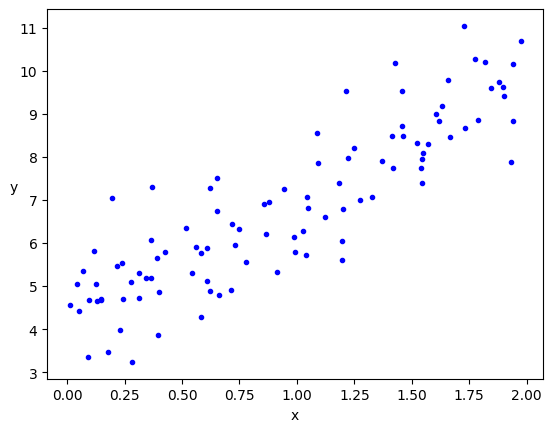

In [ ]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2
\end{equation}

In [ ]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [ ]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01.
We will start with a random prediction.

In [ ]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


Plotting the error vs Number of iterations

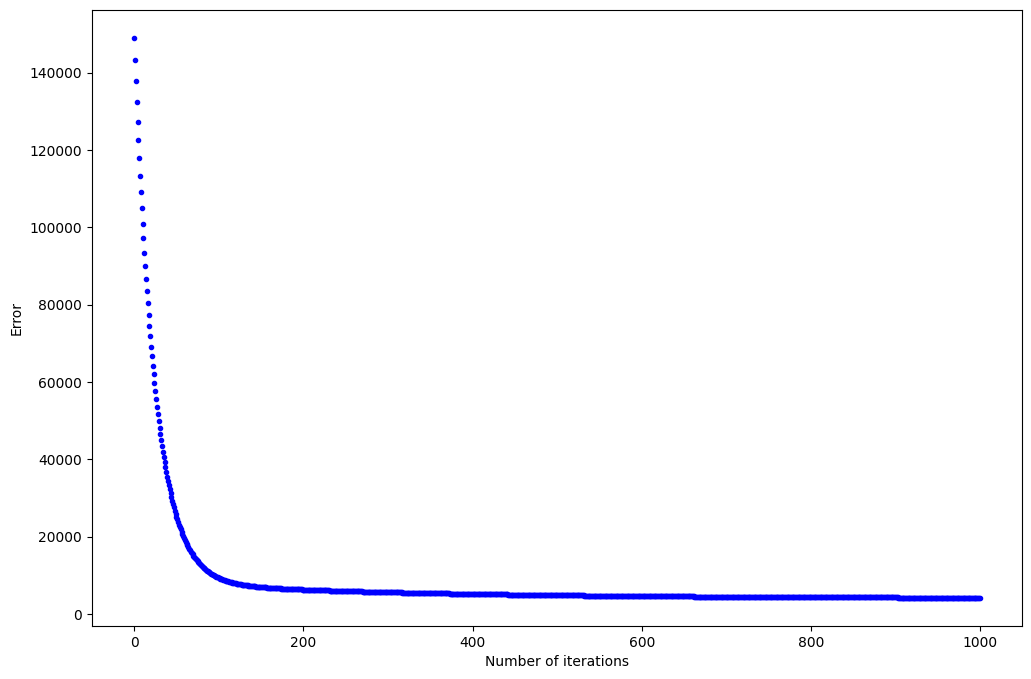

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

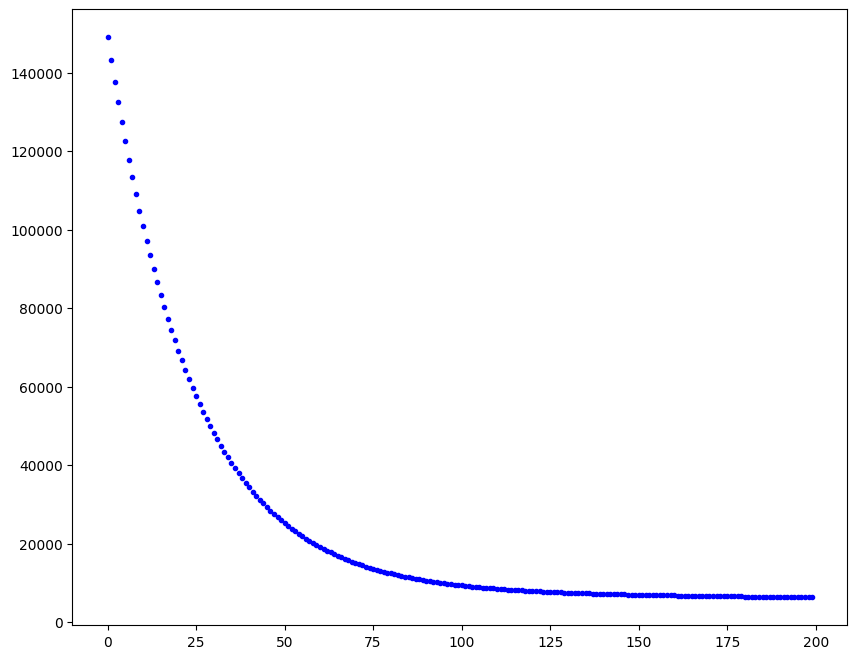

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [ ]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [ ]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


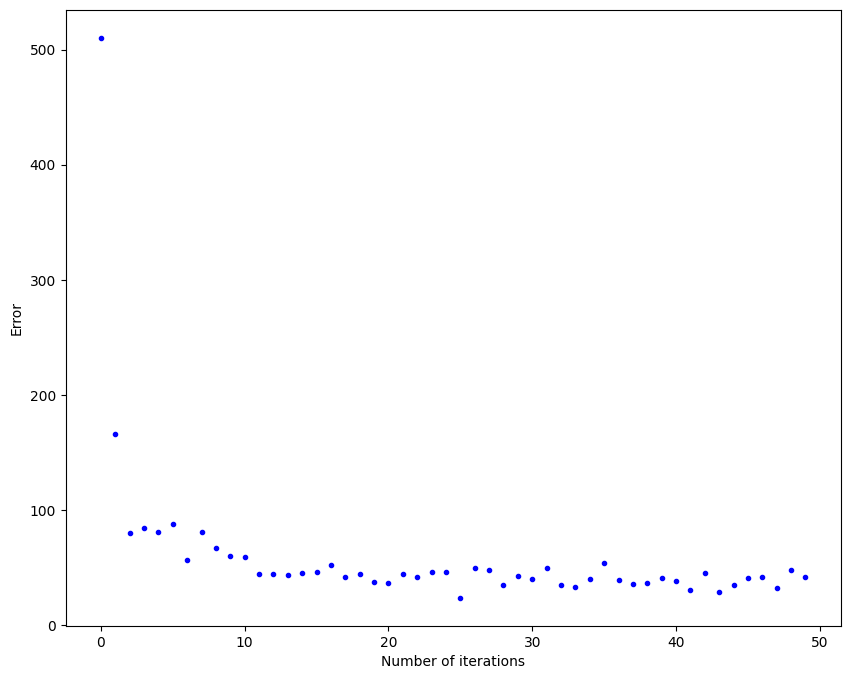

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [ ]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [ ]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


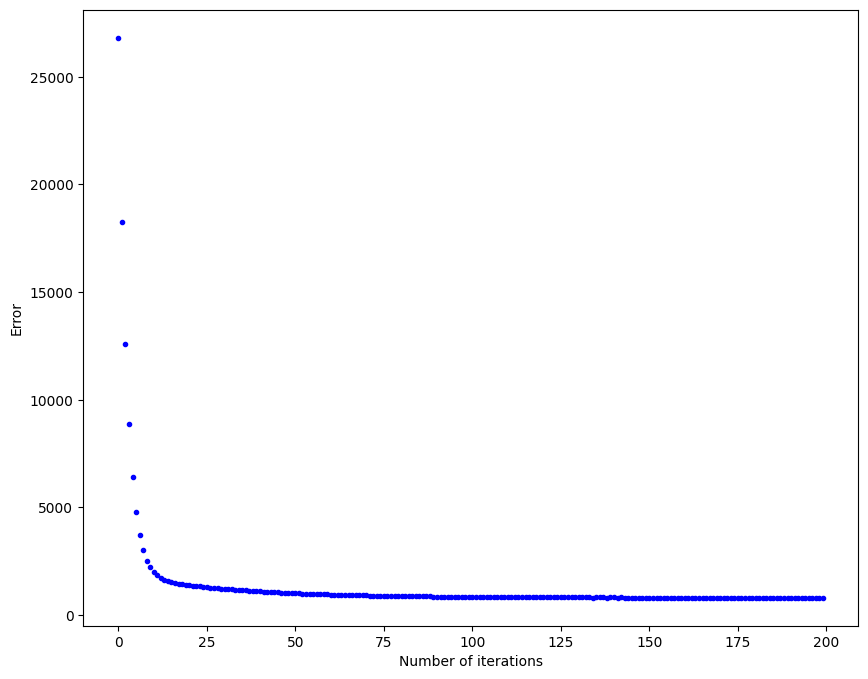

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

In [ ]:
#1

import numpy as np

def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=32):

  m = len(y)
  cost_history = np.zeros(iterations)
  n_batches = int(m/batch_size)

  for it in range(iterations):
    cost = 0.0
    indices = np.random.permutation(m)
    X = X[indices]
    y = y[indices]

    for i in range(0, m, batch_size):
      X_i = X[i:i+batch_size]
      y_i = y[i:i+batch_size]

      X_i = np.c_[np.ones(len(X_i)), X_i]
      prediction = np.dot(X_i, y_pred)

      y_pred = y_pred - (1/m) * learning_rate * (X_i.T.dot((prediction - y_i)))
      cost += cal_cost(y_pred, X_i, y_i)

    cost_history[it] = cost

  return y_pred, cost_history


Batch size: 32, Final cost: 358.8278712649024
Batch size: 64, Final cost: 85.11024655424654
Batch size: 128, Final cost: 36.436202341842254


Text(0.5, 1.0, 'Cost History for Different Batch')

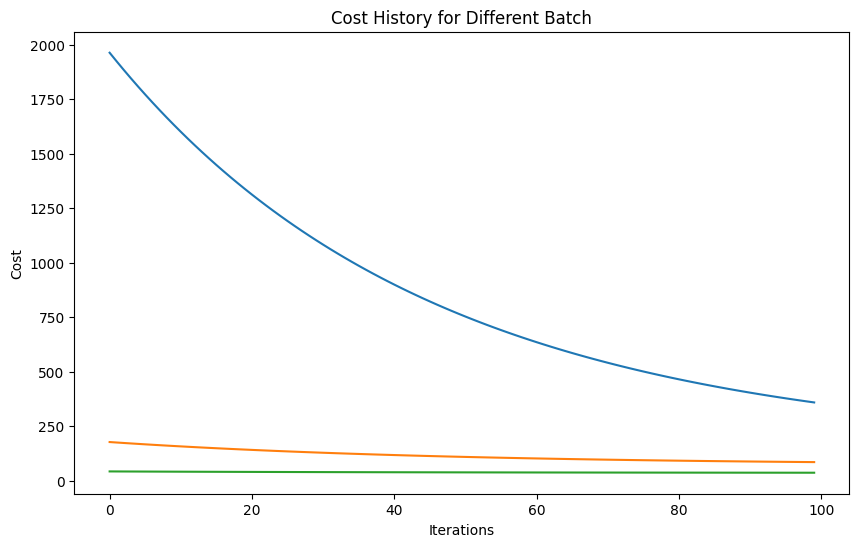

In [7]:
from re import S
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


#1 loading the dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target.reshape(-1,1)

#2 preprocessing the data
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

#3 spliting the training and testing sets :
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#4 Defining the cost function (Mean Squared Error):
def cal_cost(y_pred, X, y):
    """Calculates the cost using Mean Squared Error.

    Args:
        y_pred: The predicted values.
        X: The feature matrix.
        y: The actual target values.

    Returns:
        The calculated cost.
    """

    M = len(y)  # This line is not actually used
    predictions = X.dot(y_pred) # use y_pred instead of theta. y_pred contains the parameters
    cost = (1/ (2 * len(y))) * np.sum(np.square(predictions - y))  # Use len(y) instead of m
    return cost

#5 Defines the minibatch gradient descent function:
def minibatch_gradient_descent(X, y, theta, learning_rate=0.01, iterations=10, batch_size=32):
    m = len(y)
    cost_history = np.zeros(iterations)


    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, theta)

            theta = theta - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta, X_i, y_i)  # Pass theta to cal_cost

        cost_history[it] = cost

    return theta, cost_history

# 6. Initializing the parameters and train the model:
theta = np.random.randn(X_train.shape[1] + 1, 1)  # +1 for the bias term
learning_rate = 0.01
iterations = 100

# Test with different batch sizes:
batch_sizes = [32, 64, 128]
cost_histories = [] # Initialize cost_histories outside the loop

for batch_size in batch_sizes:
    theta, cost_history = minibatch_gradient_descent(X_train, y_train, theta, learning_rate, iterations, batch_size)
    cost_histories.append(cost_history)  # Store the cost history for each batch size
    print(f"Batch size: {batch_size}, Final cost: {cost_history[-1]}")

# 8. Visualize the cost history:
plt.figure(figsize=(10, 6))
for batch_size, cost_history in zip(batch_sizes, cost_histories):  # Assuming you stored cost_histories in a list
    plt.plot(range(iterations), cost_history, label=f'Batch Size: {batch_size}')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History for Different Batch')


3rd Answer

1) Batch Gradient Descent (BGD):
Effects of Increasing the learning rate:

1) Faster Convergence:
BGD will take larger steps towards the minimum, potentially and lead to faster convergence in the beginning.

2)Risk of overshooting:
If the learning rate is high and bgd might overshoot the minimum and oscilate around it or even diverge.

Effect of decreasing learning rate:

1) Slower Convergence:
BGD will take smaller steps whic lead to slower convergence

2)More Stable:
 A smaaller learning rate make BGD more stable and less likely to overshoot and more likely to find precise minimum.

2) Stochastic Gradient Descent:

1) Effect of increasing learning rate:

1) Large Fluctuations:
SGD will update parameters and based on the individual data points, has a higher learning rate will cause more significant fluctuation in the parameter update

2) Faster Initial Progress:
It might intially explore the parameter space more quickly

2) Effect of decreasing learning rate:

1) Smoother Convergence:
Smaller update makes the convergence path smoother

2) Slower Progress:
It takes longer to reach the minimum

3) Mini-batch Gradient Descent:

1) Effect of Increasing Learning Rate:

1) Balance between BGD and SGD:
MBGD is a compromise between BGD and SGD, so increasing the learning rate will have effects are similar to both but also less extreme.

2) Faster but less stable than BGD: It will converge faster than BGD with smaller learning rate but might has less stable than BGD with same larger learning rate.

3) More stable but slower than SGD: It will be more stable than SGD with larger learning rate but slower to converge than SGD with the same larger learning rate,

2) Effect of decreasing learning rate:

1) Smoother convergence than SGD:
this updates will be less noisy compared to SGD

2) slower but more stable than BGD:
 It will be slower than BGD with larger learning rate but more stable

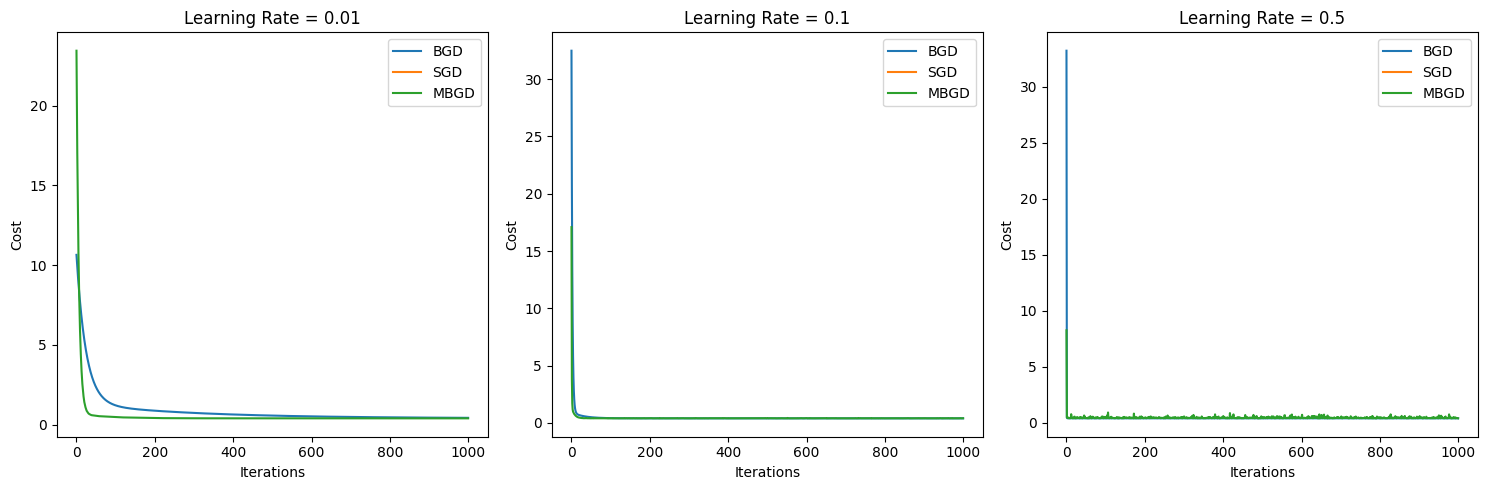

In [13]:
import numpy as np
import matplotlib.pyplot as plt

#Genereates Some Sample Data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

#Define functions for BGD,SGD And MBGD
def batch_gradient_descent(X, y, theta, learning_rate, iterations):
  m = len(y)
  theta = np.random.randn(2,1)
  cost_history = []

  for it in range(iterations):
      X_b = np.c_[np.ones((m, 1)), X]
      prediction = X_b.dot(theta)
      error = prediction - y
      gradients = (1/m) * X_b.T.dot(error)
      theta = theta - learning_rate * gradients
      cost = (1 / (2 * m)) * np.sum(np.square(error))
      cost_history.append(cost)
  return theta, cost_history

def stochastic_gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    theta = np.random.randn(2,1)
    cost_history = []

    for it in range(iterations):
        cost = 0.0
        for i in range(m):
            random_index = np.random.randint(m)
            X_i = X[random_index:random_index +1]
            y_i = y[random_index:random_index +1]
            X_b = np.c_[np.ones((1, 1)), X_i]
            prediction = X_b.dot(theta)
            error = prediction - y_i
            gradients = X_b.T.dot(error)
            theta = theta - learning_rate * gradients
            cost += (1 / (2 * m)) * np.sum(np.square(error))
        cost_history.append(cost)
        return theta, cost_history

def minibatch_gradient_descent(X, y, learning_rate, iterations, batch_size):
    m = len(y)
    theta = np.random.randn(2, 1)
    cost_history = []

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0, m, batch_size):
            X_i = X[i:i + batch_size]
            y_i = y[i:i + batch_size]
            X_b = np.c_[np.ones((len(X_i), 1)), X_i]
            prediction = X_b.dot(theta)
            error = prediction - y_i
            gradients = (1 / len(X_i)) * X_b.T.dot(error)
            theta = theta - learning_rate * gradients
            cost += (1 / (2 * m)) * np.sum(np.square(error))
        cost_history.append(cost)

    return theta, cost_history

# Experiment with different learning rates
learning_rates = [0.01, 0.1, 0.5]
iterations = 1000
batch_size = 32

# Store results for plotting
results = {}

# Run the algorithms
for lr in learning_rates:
    theta = np.random.randn(X.shape[1] + 1, 1)
    _, cost_history_bgd = batch_gradient_descent(X, y, theta, lr, iterations)  # Pass theta to the function
    _, cost_history_sgd = stochastic_gradient_descent(X, y, theta, lr, iterations)
    _, cost_history_mbgd = minibatch_gradient_descent(X, y, lr, iterations, batch_size)

    results[lr] = {
        'bgd': cost_history_bgd,
        'sgd': cost_history_sgd,
        'mbgd': cost_history_mbgd
    }

# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, lr in enumerate(learning_rates):
    ax = axes[i]
    ax.plot(results[lr]['bgd'], label='BGD')
    ax.plot(results[lr]['sgd'], label='SGD')
    ax.plot(results[lr]['mbgd'], label='MBGD')
    ax.set_title(f'Learning Rate = {lr}')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.legend()

plt.tight_layout()
plt.show()

## **Additional Critical Thinking Question**



**Which of the following is TRUE, given the optimal learning rate?**

 (i) Batch gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (ii) Stochastic gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (iii) For convex loss functions (i.e. with a bowl shape), batch gradient descent is guaranteed to eventually converge to the global optimum while stochastic gradient descent is not.

 (iv) For convex loss functions (i.e. with a bowl shape), stochastic gradient descent is guaranteed to eventually converge to the global optimum while batch gradient descent is not.

 (v) For convex loss functions (i.e. with a bowl shape), both stochastic gradient descent and batch gradient descent will eventually converge to the global optimum.

 (vi) For convex loss functions (i.e. with a bowl shape), neither stochastic gradient descent nor batch gradient descent are guaranteed to converge to the global optimum.